# Making initial imports

In [1]:
#!pip install langdetect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# NLP library imports
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zigfridzvezdin/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zigfridzvezdin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Loading data scrapped on TrustPilot

The dataframe is  composed with the comments scraped on Trustpolit at [this page](https://fr.trustpilot.com/review/www.centerparcs.fr/fr-fr).

In [63]:
df1 = pd.read_json('session_3_notebook_1.json')
df1.head()

,content,date,name,stars,title
0,\n Nous avons passé un excellent we...,2018-11-22 17:23:07,\n Cor Boonen\n,4,Week-end
1,"\n Parc très agréable, difficile de...",2018-08-08 07:52:09,\n Alain \n,3,Les TROIS FORETS
2,"\n Pas grand chose ne marche, ni l’...",2018-05-12 10:02:58,\n Manuele Civico\n,1,Pas grand chose ne marche !
3,\n Moi je vais parler aujourd'hui ...,2017-09-15 11:17:50,\n Sophie Duhamel\n,1,Non professionnel
4,"\n calme, reposant, confortable, dé...",2016-10-11 07:54:28,\n jerome\n,5,bon séjour


In [72]:
df = pd.read_csv('trip_advisor1.csv')
df = df[["review","published_date","reviewer_id","rating","title"]]
df.columns = ["content","date","name","stars","title"]
df.date = df.date.apply(lambda s: datetime.strptime(s, '%B %d, %Y'))
df.head()

,content,date,name,stars,title
0,Great weekend break with 3 friends in an exclu...,2019-01-26,0FE613A3F970F63FC8807F3CD41BF9CB,4,Fab villa.........security a bit lacking
1,We\'ve been coming for the New Year celebratio...,2019-01-27,ED7703F2E6551C6E08FA566331B1CE13,4,Still good but the last visit for us
2,Long weekend here. First time I\u2019ve been t...,2019-01-27,8087E71749FD08E4AA4A38F626396580,5,Friends birthday
3,We visited for 4 nights from Monday to Friday ...,2019-01-27,0B87894C1BB125B19994E7F037CB63DF,4,Great family break
4,I was a little dubious about going away in Jan...,2019-01-28,2A078B56BD7FA857FF449C2BCB17FE61,4,Pricey but good


In [4]:
import pandas_profiling as pdp

/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/anaconda3/lib/python3.6/site-packag

In [52]:
pdp.ProfileReport(df)

Number of variables,5
Number of observations,4357
Total Missing (%),0.0%
Total size in memory,170.3 KiB
Average record size in memory,40.0 B
Numeric,1
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Shapping dataFrame

**Making some modifications from raw data**

In [73]:
# Deleting '\n' from content and name columns
clean_n = lambda x: ' '.join(x.split()).lower()

for col in ['name', 'content']:
    df[col] = df[col].apply(clean_n)

# Setting date as index
df.set_index('date', inplace = True)

#  Displaying result
df.head()

,content,name,stars,title
date,,,,
2019-01-26,great weekend break with 3 friends in an exclu...,0fe613a3f970f63fc8807f3cd41bf9cb,4,Fab villa.........security a bit lacking
2019-01-27,we\'ve been coming for the new year celebratio...,ed7703f2e6551c6e08fa566331b1ce13,4,Still good but the last visit for us
2019-01-27,long weekend here. first time i\u2019ve been t...,8087e71749fd08e4aa4a38f626396580,5,Friends birthday
2019-01-27,we visited for 4 nights from monday to friday ...,0b87894c1bb125b19994e7f037cb63df,4,Great family break
2019-01-28,i was a little dubious about going away in jan...,2a078b56bd7fa857ff449c2bcb17fe61,4,Pricey but good


# Exploratory Data Analysis

In [74]:
# Even if not really useful for this case, a good habit is to start with df.describe() and df.info() when you start working on a dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 2019-01-26 to 2016-03-02
Data columns (total 4 columns):
content    4357 non-null object
name       4357 non-null object
stars      4357 non-null int64
title      4357 non-null object
dtypes: int64(1), object(3)
memory usage: 170.2+ KB


**Studying eventual doubles**

- We're here looking at names which are pseudos. Be careful, differents people could use the same ones. The date is a good indicator to know if the same person let 2 comments.

In [75]:
print('Number of comments', df.name.count())
print('Number of unique names: ', df.name.nunique())

double = df.name.value_counts().index.tolist()[:sum(df.name.value_counts()>=2)]
for name in double:
    print('\n',name)
    date_double = df[df.name==name].index.tolist()
    content_double = df[df.name==name].content.tolist()
    [print(date,content) for date,content in zip(date_double,content_double)]

Number of comments 4357
Number of unique names:  4197

 22e7211f942978c76ba642e097e3e188
2018-11-19 00:00:00 it has been our family tradition to visit winter wonderland every year since our son was young and he\'s now nearly 19, so you could say we love it here :) tried to save some money and visit right at the start of winter wonderland and, whilst the decorations around the village are lovely it doesn\'t feel the same as in december. we started our break in the spa, i understand they are giving it a significant upgrade so there was some work going on. the spa was enjoyable and relaxing, nice touch to have staff members offering complimentary face packs. due to the predicted wet weather i booked a lot more indoor activities than usual, it is advisable to pre-book as the popular time slots can go quickly. enjoyed trying new activities of football pool (cheap at \u00a310 for 45 minutes and good for everyone as no skill needed) and locked in a room, this was rather expensive but enjoyabl

2018-10-05 00:00:00 another lovely stay in the adapted lodges as we were supporting adults with learning disabilities, think this was our fourth year on the trot staying here and our residents really enjoyed it - but i must say this year there was one person that made our holiday, what a lovely friendly lady who spoke to our residents and not over them, nothing was a problem for her and gave us a perfect table where everyone had their own space, a truly enjoyable experience- thank you so much jane potter in hucks, see you next year \ud83d\ude00\ud83d\ude00\ud83d\ude00
2017-10-16 00:00:00 we were on a working holiday with people with learning difficulties, we had 2 adapted lodges which were spotless and very close to the plaza which was a big bonus, we have been here several times and definitely prefer the adapted accommodation, staff were very helpful, on our visit to the spa judy was a god send for our requirements, nothing was too much trouble for her - a truly lovely lady.

 6563f2f

You might find interesting things in your dataset. 

For example it is fun here to see **Peltier**'s comments and how he changed is mind:

- April 14th 13:41 : "formule intéressante pour de courtes vacances"
- April 14th 20:33 : "pas de réseau et deux chaines tv manquantes" 



**Rapid overview of global rating**


Average rating is : 4.01


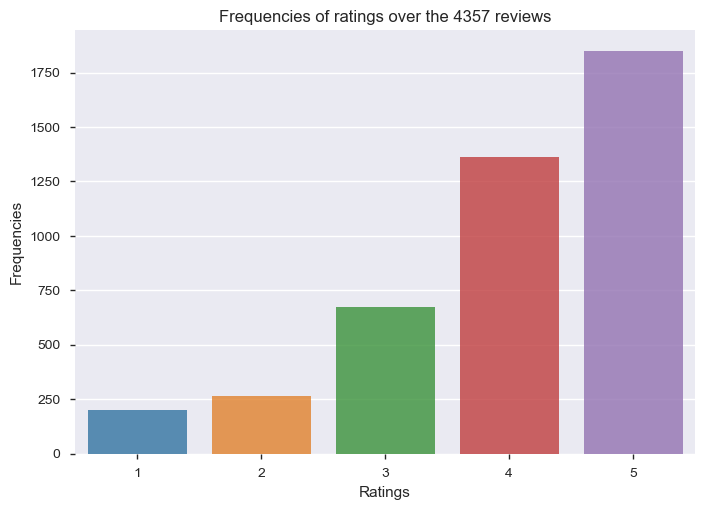

In [76]:
# Average rating value
print('Average rating is : {}'.format(round(df.stars.mean(),2)))

# Plotting rating distribution
X_ratings = df.stars.value_counts()
ax = sns.barplot(X_ratings.index,X_ratings,alpha=0.8)
ax.set(xlabel='Ratings',ylabel='Frequencies',title='Frequencies of ratings over the {} reviews'.format(df.shape[0]))
plt.show()

**Distribution of comments length**

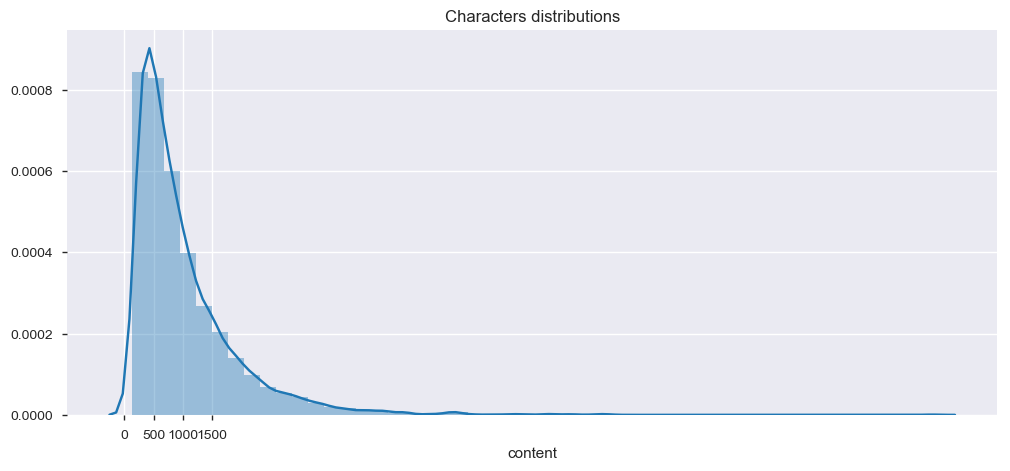

In [77]:
# Making the plot
x = plt.figure(figsize=(12,5))
sns.distplot(df['content'].apply(len))
plt.title('Characters distributions')
plt.xticks(range(0,2000,500))
plt.show()

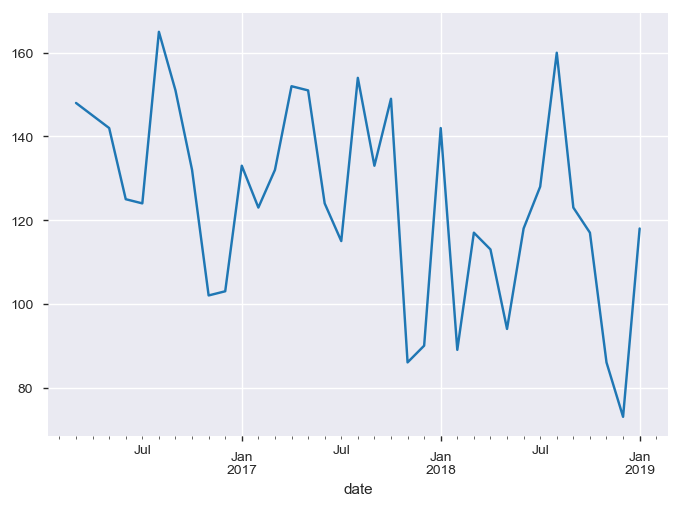

In [78]:
# Repartition of reviews dates
df['content'].resample('M').count().plot()

# Pre-Processing 1 : Filters for punctuation and specific characters

In [79]:
# creating a list with all reviews
all_reviews = df.content.tolist()

In [80]:
# transformating comments into lower-case text 
lower_reviews = [review.lower() for review in all_reviews]

In [81]:
# deleting all specific caracters
characters_to_remove = ["@", "/", "#", ".", ",", "!", "?", "(", ")", "-", "_","’","'", "\"", ":"]
transformation_dict = {initial:" " for initial in characters_to_remove}
no_punctuation_reviews = [review.translate(str.maketrans(transformation_dict)) for review in lower_reviews]

In [82]:
# removing accent
with_accent = ['é', 'è', 'à']
without_accent = ['e', 'e', 'a']
transformation_dict = {before:after for before, after in zip(with_accent, without_accent)}
no_accent_reviews = [review.translate(str.maketrans(transformation_dict)) for review in no_punctuation_reviews]

In [83]:
# Displaying some results 
for i in range(5):
    print(all_reviews[i])
    print(no_accent_reviews[i])
    print('\n')

great weekend break with 3 friends in an exclusive 4 bed villa with hot tub, sauna,steam room and games room. all en suite rooms so we all had our privacy. did bollywood dancing and an escape room.............good value. only down side was coming back from lunch to find our villa had been left unlocked with doors wide open by cleaners. luckily nothing was missing but we weren\'t impressed with that aspect.
great weekend break with 3 friends in an exclusive 4 bed villa with hot tub  sauna steam room and games room  all en suite rooms so we all had our privacy  did bollywood dancing and an escape room             good value  only down side was coming back from lunch to find our villa had been left unlocked with doors wide open by cleaners  luckily nothing was missing but we weren\ t impressed with that aspect 


we\'ve been coming for the new year celebrations at centre parcs for 9 years now, so we\'ve seen the changes over that time and the ever-rising cost of the break. this year the b

In [84]:
def number_of_unique_words(list_of_reviews):
  
    # Concatenating all reviews from the list
    all_words = ''.join(list_of_reviews)

    # Tokenizing
    unique_tokens = set(word_tokenize(all_words))
  
    # Returning length of list
    return len(unique_tokens)

In [85]:
print(number_of_unique_words(all_reviews))

26517


In [86]:
print(number_of_unique_words(lower_reviews))

26517


In [87]:
print(number_of_unique_words(no_punctuation_reviews))

17645


In [88]:
print(number_of_unique_words(no_accent_reviews))

17645


# Pre-processing 2 : Tokenization

**Doing it in two different ways**

In [24]:
# Using regular expression
tokenized_reviews_re = [re.split('\s+', review) for review in no_accent_reviews]

In [25]:
# using NLP libraries
tokenized_reviews_nltk = [word_tokenize(review) for review in no_accent_reviews]

**And making a comparison of results**

In [26]:
# Making a comparison between both of them
print("With NLTK  library : {}".format(len(tokenized_reviews_nltk)))
print("With RegEx library : {}".format(len(tokenized_reviews_re)))

With NLTK  library : 304
With RegEx library : 304


**Try to analyze the next lines of code and to understand the difference between both of them**

Here is an original review

In [30]:
# Choosing a review to inspect
n_review = 10
print(all_reviews[n_review])

pdt les vacances scolaires, sans la riviere sauvage et avec seulement 2 toboggans accessibles a moins d 1,4m beaucoup de queue et d'attente ( un seul en plus pour les plus grands) , peu de diversité du coup et l'ennui arrive inevitablement. un bowling? il reste de la place a midi, super! on prendra des tapas!... non ils sont sur la carte mais non dispos... assiette de charcuterie?? non plus ... donc rien a manger du coup, après la séance: plus de 30 min de queue avant de pouvoir commander une pizza... on avait vraiment faim.:-(


And here are the tokenized ones

In [31]:
print(tokenized_reviews_nltk[n_review])

['pdt', 'les', 'vacances', 'scolaires', 'sans', 'la', 'riviere', 'sauvage', 'et', 'avec', 'seulement', '2', 'toboggans', 'accessibles', 'a', 'moins', 'd', '1', '4m', 'beaucoup', 'de', 'queue', 'et', 'd', 'attente', 'un', 'seul', 'en', 'plus', 'pour', 'les', 'plus', 'grands', 'peu', 'de', 'diversite', 'du', 'coup', 'et', 'l', 'ennui', 'arrive', 'inevitablement', 'un', 'bowling', 'il', 'reste', 'de', 'la', 'place', 'a', 'midi', 'super', 'on', 'prendra', 'des', 'tapas', 'non', 'ils', 'sont', 'sur', 'la', 'carte', 'mais', 'non', 'dispos', 'assiette', 'de', 'charcuterie', 'non', 'plus', 'donc', 'rien', 'a', 'manger', 'du', 'coup', 'apres', 'la', 'seance', 'plus', 'de', '30', 'min', 'de', 'queue', 'avant', 'de', 'pouvoir', 'commander', 'une', 'pizza', 'on', 'avait', 'vraiment', 'faim']


In [32]:
print(tokenized_reviews_re[n_review])

['pdt', 'les', 'vacances', 'scolaires', 'sans', 'la', 'riviere', 'sauvage', 'et', 'avec', 'seulement', '2', 'toboggans', 'accessibles', 'a', 'moins', 'd', '1', '4m', 'beaucoup', 'de', 'queue', 'et', 'd', 'attente', 'un', 'seul', 'en', 'plus', 'pour', 'les', 'plus', 'grands', 'peu', 'de', 'diversite', 'du', 'coup', 'et', 'l', 'ennui', 'arrive', 'inevitablement', 'un', 'bowling', 'il', 'reste', 'de', 'la', 'place', 'a', 'midi', 'super', 'on', 'prendra', 'des', 'tapas', 'non', 'ils', 'sont', 'sur', 'la', 'carte', 'mais', 'non', 'dispos', 'assiette', 'de', 'charcuterie', 'non', 'plus', 'donc', 'rien', 'a', 'manger', 'du', 'coup', 'apres', 'la', 'seance', 'plus', 'de', '30', 'min', 'de', 'queue', 'avant', 'de', 'pouvoir', 'commander', 'une', 'pizza', 'on', 'avait', 'vraiment', 'faim', '']


In [33]:
# We select the second one which seems more accurate
tokenized_reviews = tokenized_reviews_nltk

# Pre-processing 3 : Stopword removing

In [34]:
# Using a list with words to delete
stopW = stopwords.words('french')

In [35]:
# Customizing it with our needs
stopW += ['les', 'a', 'tout']

In [36]:
# Stopword_list
stopword_reviews = [[token for token in review if token not in stopW] for review in tokenized_reviews]
              

# Some visualization about what we've done

In [37]:
def plot_frequent_words(list_of_words):    
    dist = nltk.FreqDist(list_of_words)
    X = [nb[1] for nb in dist.most_common(20)]
    y = [nb[0] for nb in dist.most_common(20)]
    ax = sns.barplot(X,y)
    ax.set(xlabel='Word frequencies',ylabel='Words',title='Most common words in the corpus')
    plt.show()

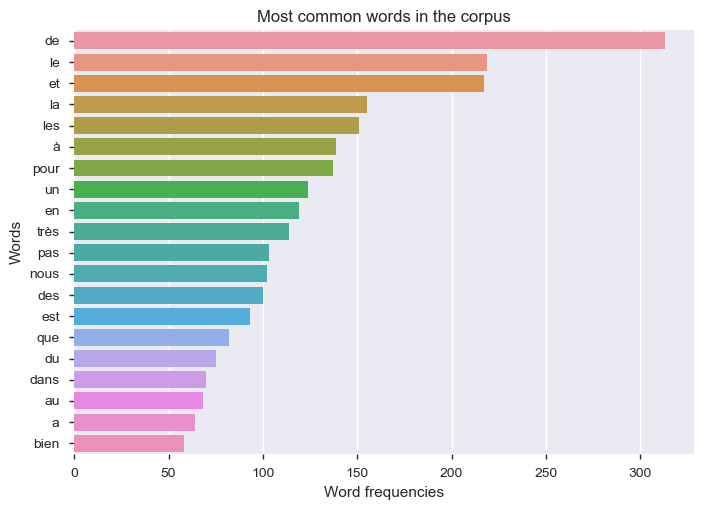

8546


In [38]:
# Making a first plot with original data
all_words = []
for review in all_reviews:
    for word in review.split():
        all_words.append(word)

plot_frequent_words(all_words)
print(len(all_words))

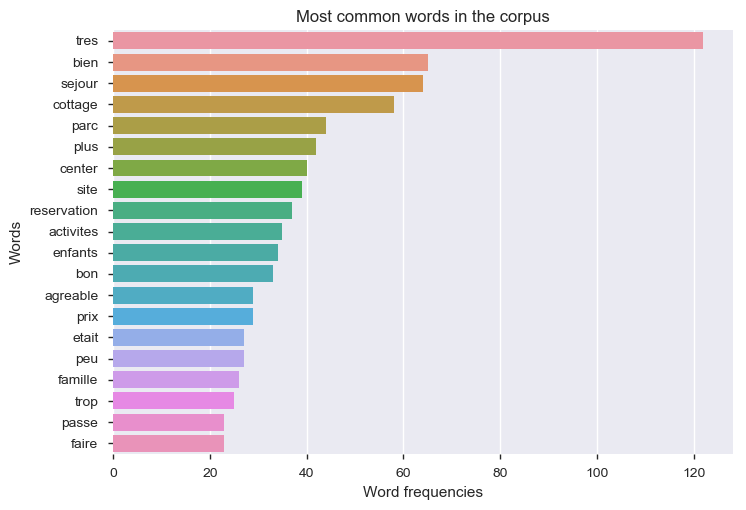

4969


In [40]:
# And making it with our current data
all_words = []
for review in stopword_reviews:
    for word in review:
        all_words.append(word)

plot_frequent_words(all_words)
print(len(all_words))



...Much better ! Isn't it ?

# TO DO : Now you can apply all of these methods to your own DataFrame


**The purpose is to create a second column with reviews content but processed and tokenized**

# BONUS : A little exercice about RegEx

**Try some patterns on the next strings**

You can use the different functions
- re.split() : to split my_string on the pattern and print the result.
- re.findall() : find all the occurences matching the pattern in the total string.

In [ ]:
import re
my_string = "Let's write RegEx!"

PATTERN = r"\s+"
# PATTERN = r"[a-z]"
# PATTERN = r"\w"
# PATTERN = r"\w+"

In [ ]:
re.findall(PATTERN, my_string)

In [ ]:
re.split(PATTERN, my_string)

**Given the table show in course, try to make the following match**

In [ ]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[___]"

# Split my_string on sentence endings and print the result
print(re.____(____, ____))

In [ ]:
# Find all capitalized words in my_string and print the result
capitalized_words = r"[___]\w+"
print(re.____(____, ____))

In [ ]:
# Split my_string on spaces and print the result
spaces = r"___"
print(re.____(____, ____))

In [ ]:
# Find all digits in my_string and print the result
digits = r"___"
print(re.____(____, ____))